In [33]:
import os
import librosa
import warnings
warnings.filterwarnings("ignore")
datadir = os.getcwd() + '/Piano/macro-output/'
signals = []
names = []
for item in os.listdir(datadir):
        name = item[0]
        names.append(name)
        signal, sr = librosa.load(datadir+item)
        signals.append(signal)
signals = [x for _,x in sorted(zip(signals,names))]
names   = [x for _,x in sorted(zip(signals,signals))]
print(names)

ValueError: operands could not be broadcast together with shapes (120423,) (105840,) 

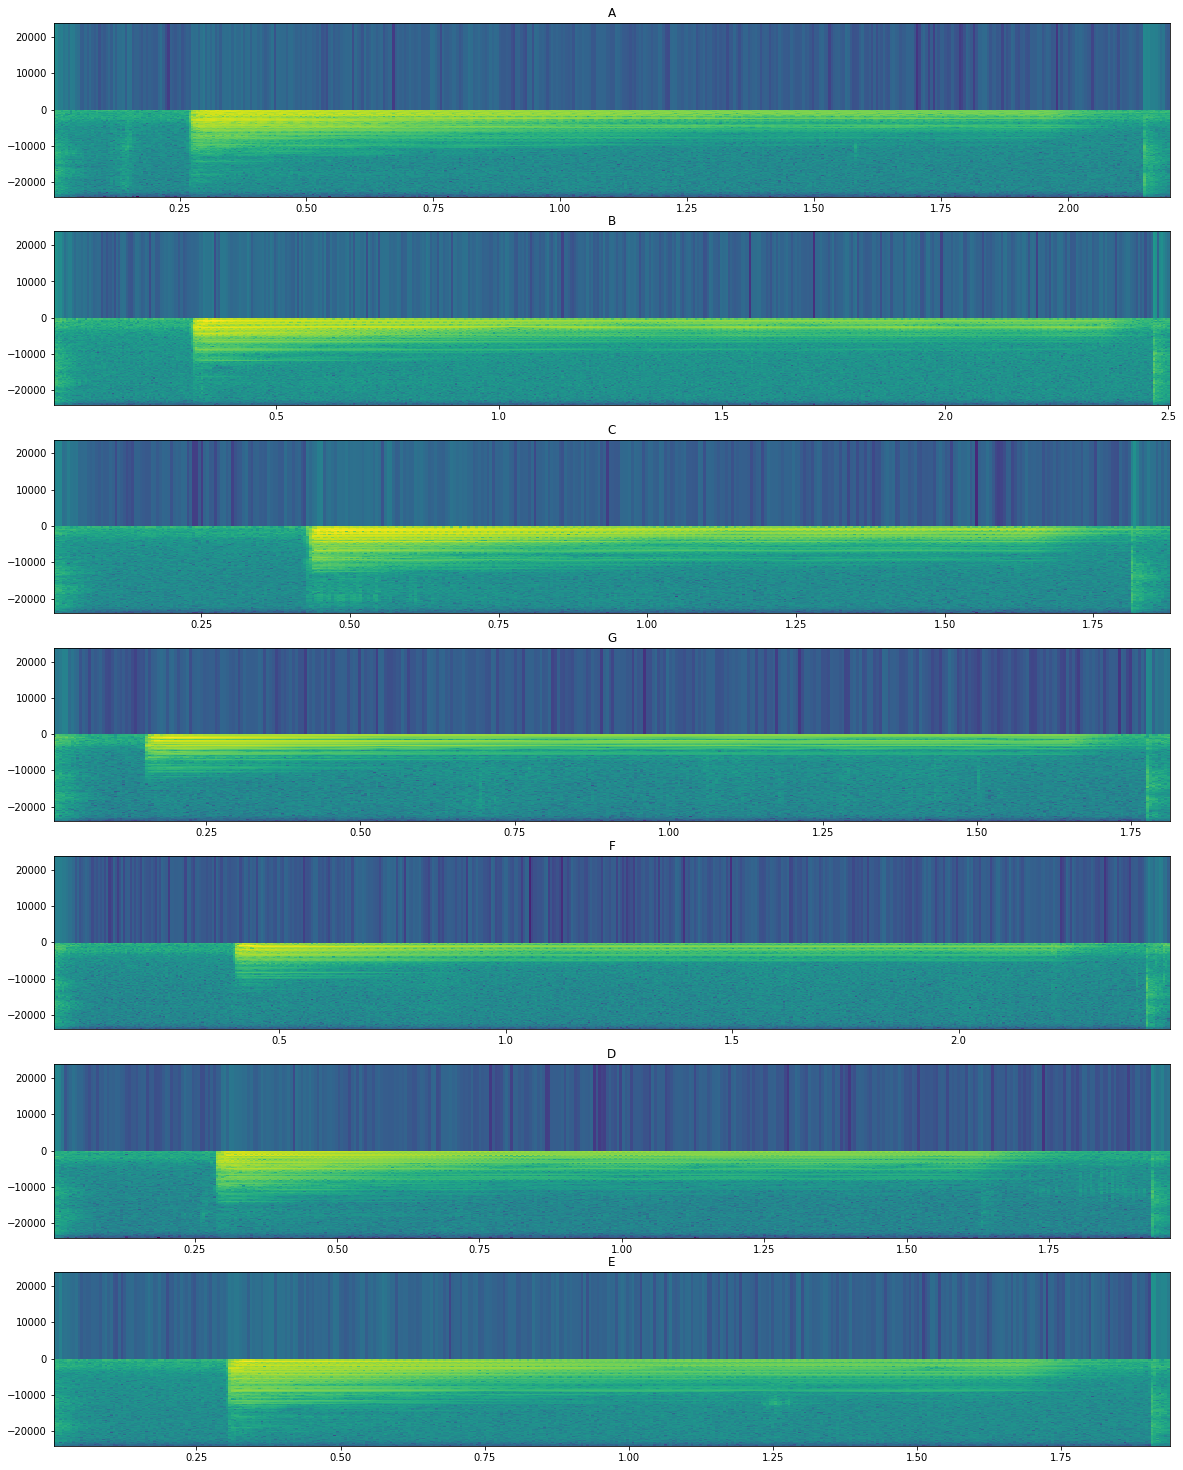

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sp

spectrograms = []
#Shape analysis
for signal in signals:
    spectrograms.append(sp.spectrogram(signal, 48000, return_onesided=False))
plt.figure(figsize=(20,30))
counter = 1 
for (spec, name) in zip(spectrograms, names):
    (t, f, Sxx) = spec
    Sxx = np.log(abs(Sxx))
    Sxx/=10
    plt.subplot(8,1,counter)
    plt.pcolormesh(f, t, Sxx)
    plt.title(name)
    plt.xlim()
    counter +=1